# Modelling

Models used by BrendaLoznik:
- `RandomForestClassifier`
- `XGBClassifier`
- `CatBoostClassifier`
- `BaggingClassifier`
- `StackingClassifier`
- Weighted Vote
- SHAP (SHapley Additive exPlanations) with `TreeExplainer`

### **Our contribution**

Hyperparameter tuning for `XGBClassifier` and weights tuning for Weighted Vote

Implementing new models:
- `LGBMClassifier`
- `GradientBoostingClassifier`
- `AdaBoostClassifier`
- `ExtraTreesClassifier`
- `MLPClassifier`


In [20]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [21]:
train_set = pd.read_csv("final_df.csv")
train_set = train_set.drop('Unnamed: 0', axis=1)

/var/folders/vg/953jt4190_x2bp1n7tcvzfpr0000gn/T/ipykernel_26601/3498357959.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv("final_df.csv")


### Train/Test Split

In [22]:
train_set = train_set[train_set['status_group'].notna()]
test_set = train_set[train_set['status_group'].isna()]

#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']

encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

### Random forest params tuning

Performed by BrendaLoznik with the following results:
- `max_depth`: 30
- `max_features`: 'log2'
- `min_samples_split`: 8
- `n_estimators`: 150


In [ ]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=8, n_estimators=150, random_state=42, warm_start=True)

### XGBoost parameter tuning

In [ ]:
# # Create training and test sets: test size 0.2
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# param_grid = { 
#     'n_estimators': [50, 100, 200],
#     'colsample_bytree' :[ 0.3, 0.4, 0.5],
#     'eta': [0.15, 0.2, 0.3],
#     'max_depth': [10, 11, 12, 13, 14, 15]
#     }

# #Create a based model
# xgb = XGBClassifier( random_state=42)

# grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

# #fitmodel
# grid_search_xgb.fit(X_train, y_train,  eval_metric = 'mlogloss',)

# #print best parameters 
# print('Best Score:', grid_search_xgb.best_score_)
# print('Parameters:', grid_search_xgb.best_params_)
# print('Best Model:', grid_search_xgb.best_estimator_)

In [19]:
# Best Score: 0.8103495737302167
# Parameters: {'colsample_bytree': 0.3, 'eta': 0.15, 'max_depth': 12, 'n_estimators': 100}
# Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=0.3, early_stopping_rounds=None,
#               enable_categorical=False, eta=0.15, eval_metric=None,
#               feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
#               importance_type=None, interaction_constraints=None,
#               learning_rate=None, max_bin=None, max_cat_threshold=None,
#               max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
#               max_leaves=None, min_child_weight=None, missing=nan,
#               monotone_constraints=None, n_estimators=100, n_jobs=None,
#               num_parallel_tree=None, objective='multi:softprob', ...)

### XGBoost Ensemble

Accuracy score (train): 0.9305
Accuracy score (test): 0.8152
Precision score (train): 0.9323
Precision score (test): 0.8115
Recall score (train): 0.9305
Recall score (test): 0.8152
F1 score (train): 0.9284
F1 score (test): 0.8044
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6452
           1       0.65      0.27      0.38       863
           2       0.86      0.78      0.82      4565

    accuracy                           0.82     11880
   macro avg       0.77      0.65      0.68     11880
weighted avg       0.81      0.82      0.80     11880



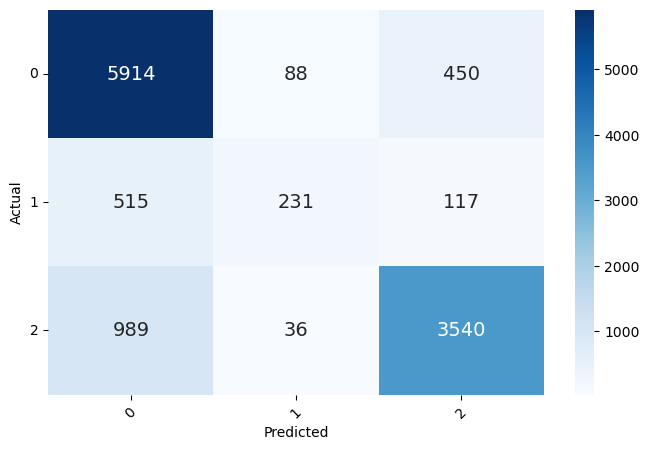

In [23]:
# 100 estimators turns out to be the best

xgb1 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 42)
xgb2 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 2) 
xgb3 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 142) 
xgb4 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 33 )
xgb5 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 678)
xgb6 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 53)
xgb7 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 23)
xgb8 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 63)
xgb9 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 342)
xgb10 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 634)
xgb11 = XGBClassifier(max_depth =12, n_estimators= 100, colsample_bytree = 0.3, eta = 0.15, random_state = 5)

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5), ('xgb6', xgb6), ('xgb7', xgb7), ('xgb8', xgb8), ('xgb9', xgb9), ('xgb10', xgb10), ('xgb11', xgb11)], voting = 'soft')       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred)

# Calculate precision scores
precision_train = precision_score(y_train, pred_train, average='weighted')
precision_test = precision_score(y_test, pred, average='weighted')

# Calculate recall scores
recall_train = recall_score(y_train, pred_train, average='weighted')
recall_test = recall_score(y_test, pred, average='weighted')

# Calculate F1 scores
f1_train = f1_score(y_train, pred_train, average='weighted')
f1_test = f1_score(y_test, pred, average='weighted')

print("Accuracy score (train): {:.4f}".format(accuracy_train))
print("Accuracy score (test): {:.4f}".format(accuracy_test))
print("Precision score (train): {:.4f}".format(precision_train))
print("Precision score (test): {:.4f}".format(precision_test))
print("Recall score (train): {:.4f}".format(recall_train))
print("Recall score (test): {:.4f}".format(recall_test))
print("F1 score (train): {:.4f}".format(f1_train))
print("F1 score (test): {:.4f}".format(f1_test))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### CatBoost

Performed by BrendaLoznik with the following results:
- `rsm`: 0.2
- `max_depth`: '9'
- `iterations`: 1000

In [ ]:
cat = CatBoostClassifier(rsm=0.2, max_depth=9, iterations=1000, random_state=42)

### Bagging Classifier

Performed by BrendaLoznik with the following results:
- `n_estimators`: 1000
- `max_features`: '0.4'

In [ ]:
bag = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )

### Weighted vote

In [13]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42) 

In [ ]:
import random

# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

best_weights = [0, 0, 0, 0]
best_acc = 0.0

i = 0

while True:
    i+=1

    w = [round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3), round(random.uniform(0.3, 1.0), 3)]

    vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = w)         

    #fit and predict
    vc.fit(X_train , y_train)
    pred= vc .predict(X_test)
    pred_train = vc .predict(X_train)

    acc = accuracy_score(y_test, pred)

    #print best model scores on test data
    print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
    print("Accuracy score test: {}".format(acc))
    print("Weights:", w)

    if acc > best_acc:
        best_acc = acc
        best_weights = w

    print("Best weights:", best_weights, "with result:", best_acc)

    # open the file in write mode
    with open('output.txt', 'a') as f:
        # print best model scores on test data to file
        f.write("\nIteration: {}\n".format(i))
        f.write("Accuracy score train: {}\n".format(accuracy_score(y_train, pred_train)))
        f.write("Accuracy score test: {}\n".format(acc))
        f.write("Weights: {}\n".format(w))
        f.write("Best weights: {} with result: {}\n".format(best_weights, best_acc))


# Best weights: [0.861, 0.78, 0.706, 0.751] with 

The best weights found are [0.861, 0.78, 0.706, 0.751] with accuracy 0.8175925925925925 after 211 iterations.

### Stacking

Solution by BrendaLoznik

In [ ]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('cat', cat), ('bag', bag)],
    final_estimator=LogisticRegression()
    )
                       

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### SHAP (SHapley Additive exPlanations)

Solution by BrendaLoznik

In [ ]:
df=train_set.copy()

#calcualte how many samples of each status group I need
required_samples = len(df)*0.4  #40%
functional_samples = round(required_samples* 0.543081)
non_functional_samples = round(required_samples * 0.384242)
repair_samples = round(required_samples * 0.072677)

#create sepperate df for each status group
functional = df[df['status_group']=='functional']
non_functional = df[df['status_group']=='non functional']
repair = df[df['status_group']=='functional needs repair']

#create a random sample of each rstatus group
sample_functional = functional.sample(n = functional_samples, random_state=1, )
sample_non_functional = non_functional.sample(n = non_functional_samples, random_state=1, )
sample_repair = repair.sample(n = repair_samples, random_state=1, )

#combine the random samples to a single df
sample = sample_functional.append(sample_non_functional)
sample = sample.append(sample_repair)

#define X and y for training the model
X= sample.drop(['id', 'status_group'], axis=1)
y = sample['status_group']

#define and fit the model
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
rf.fit(X, y)

#calculate SHAP
explainer = shap.TreeExplainer(rf)
shap_values_train = explainer.shap_values(X)

#plot SHAP
shap.summary_plot(shap_values_train, X_train.values, plot_type="bar",  feature_names = X.columns)


## New models

In [24]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Light GBM

In [ ]:
# LightGBM
param_grid_lgbm = {
    'max_depth': [7, 8, 9],
    'num_iterations': [1000, 750],
    'bagging_fraction': [0.3, 0.2]
}

lgbm = LGBMClassifier(random_state=42)
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=2, scoring='accuracy')
grid_search_lgbm.fit(X_train, y_train)

print('LightGBM - Best Score:', grid_search_lgbm.best_score_)
print('LightGBM - Best Parameters:', grid_search_lgbm.best_params_)
print('LightGBM - Best Model:', grid_search_lgbm.best_estimator_)
print()

### Gradient Boosting

In [ ]:
# Gradient Boosting
param_grid_gb = {
    'max_depth': [7, 8, 9],
    'n_estimators': [1000, 750],
    'learning_rate': [0.1, 0.01]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, verbose=2, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

print('Gradient Boosting - Best Score:', grid_search_gb.best_score_)
print('Gradient Boosting - Best Parameters:', grid_search_gb.best_params_)
print('Gradient Boosting - Best Model:', grid_search_gb.best_estimator_)
print()

In [ ]:
# Best performing model
# gb = GradientBoostingClassifier(max_depth=, n_estimators=, learning_rate=, random_state=42)

### AdaBoost

In [26]:
# AdaBoost
param_grid_ada = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

ada = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, verbose=2, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

print('AdaBoost - Best Score:', grid_search_ada.best_score_)
print('AdaBoost - Best Parameters:', grid_search_ada.best_params_)
print('AdaBoost - Best Model:', grid_search_ada.best_estimator_)
print()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.8s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   2.8s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.7s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.7s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.6s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.6s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   5.6s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   8.8s
[CV] END ................learning_rate=0.1, n_est

AdaBoost - Best Score: 0.7343167659087632

AdaBoost - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}

AdaBoost - Best Model: AdaBoostClassifier(learning_rate=0.1, n_estimators=300, random_state=42)

In [ ]:
# Best performing model
ada = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)

### Extra Trees

In [27]:
# Extra Trees Classifier
param_grid_etc = {
    'max_depth': [7, 8, 9],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4, 6]
}

etc = ExtraTreesClassifier(random_state=42)
grid_search_etc = GridSearchCV(estimator=etc, param_grid=param_grid_etc, cv=5, verbose=2, scoring='accuracy')
grid_search_etc.fit(X_train, y_train)

print('Extra Trees Classifier - Best Score:', grid_search_etc.best_score_)
print('Extra Trees Classifier - Best Parameters:', grid_search_etc.best_params_)
print('Extra Trees Classifier - Best Model:', grid_search_etc.best_estimator_)
print()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END .max_depth=7, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END .max_depth=7, min_samples_split=2, n_e

Extra Trees Classifier - Best Score: 0.7503104017125904

Extra Trees Classifier - Best Parameters: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 200}

Extra Trees Classifier - Best Model: ExtraTreesClassifier(max_depth=9, min_samples_split=4, n_estimators=200,
                     random_state=42)

In [ ]:
# Best performing model
etc = ExtraTreesClassifier(max_depth=0, n_estimators=200, min_samples_split=4, random_state=42)

### Artificial Neural Networks

In [29]:
# Neural Networks
param_grid_nn = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

nn = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=5, verbose=2, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

print('Neural Networks - Best Score:', grid_search_nn.best_score_)
print('Neural Networks - Best Parameters:', grid_search_nn.best_params_)
print('Neural Networks - Best Model:', grid_search_nn.best_estimator_)
print()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   7.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   7.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   5.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=co

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  24.8s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  26.0s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  23.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  15.5s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  22.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  13.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   7.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   7.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   7.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=  12.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=  10.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=  17.6s
[CV] EN

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  32.4s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  35.0s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  30.7s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  22.2s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  28.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=  36.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=  51.3s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=  47.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=  36.9s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=  42.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=  22.9s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=  44.8s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   8.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=  11.8s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=  31.

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=  53.8s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=  39.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=  44.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  35.0s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  44.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  20.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  33.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  24.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  25.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  10.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  28.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  18.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=  18.2s
[CV] END ac

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  28.7s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  29.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  24.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  26.8s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=  27.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  30.2s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  46.6s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  33.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  19.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=  19.5s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   6.8s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.9s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   6.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.3s
[CV] E

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=  38.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=  28.8s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=  22.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=  21.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  23.9s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  16.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  14.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  16.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=  13.1s
[CV] E

/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  50.4s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  41.4s


/Users/filip/miniconda3/envs/dsml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=  57.0s


In [ ]:
# Best performing model
# nn = MLPClassifier(hidden_layer_sizes=, activation=, solver=, learning_rate=, random_state=42)

### Weighted Vote of the best found models

In [ ]:
# vc = VotingClassifier([MODELS], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
# vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.861, 0.78, 0.706, 0.751])

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

# Answering Research Questions

### 1. What are the main factors associated with pump failure or malfunction, and how do these vary across different regions of Tanzania?

### 2. Which operators and/or management groups have the highest success rates in maintaining water pumps, and how do these rates vary based on factors which may make pump maintenance easier, such as water cost, pump type, or location remoteness?

### 3. What are the interactions between different features, such as water quantity and pump type, which could provide insights into the underlying causes of pump failure?

### 4. How does the age of a water pump relate to its functionality, and is there a point at which pumps become significantly more likely to break down or require replacement?

### 5. What is the most reliable machine learning method for pump failure prediction?